In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

### Conhecendo os dados

In [45]:
data = pd.read_csv("student-por.csv", sep=";")

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [47]:
# Número de alunos por escola
data["school"].value_counts()

GP    423
MS    226
Name: school, dtype: int64

In [48]:
# dividir em dois grupos de acordo com a escola
gpA = data[data["school"] == "GP"]
gpB = data[data["school"] == "MS"]

In [49]:
media_escola_A = gpA['G3'].mean()
media_escola_B = gpB['G3'].mean()

media_geral = (media_escola_A * len(gpA) + media_escola_B * len(gpB)) / (len(gpA) + len(gpB))


# Cálculo dos quadrados dos desvios por escola
soma_quadrados_A = np.sum((gpA['G3'] - media_escola_A) ** 2)
soma_quadrados_B = np.sum((gpB['G3'] - media_escola_B) ** 2)

# Cálculo da soma dos quadrados totais (SST)
sst = soma_quadrados_A + soma_quadrados_B

# Cálculo da soma dos quadrados entre as escolas (SSB)
ssb = len(gpA) * (media_escola_A - media_geral) ** 2 + \
      len(gpB) * (media_escola_B - media_geral) ** 2

# Cálculo do coeficiente de correlação intra-escolar (ICC)
icc = ssb / sst

print(icc)

0.08792994878419053


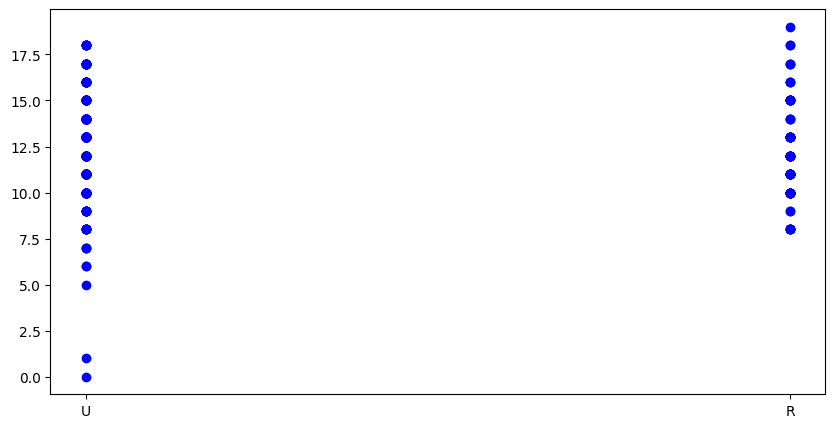

In [50]:
# Gráfico de dispersão das notas finais por escola
plt.figure(figsize=(10,5))
plt.scatter(gpA["address"], gpA["G3"], color="blue", label="GP")

<AxesSubplot: >

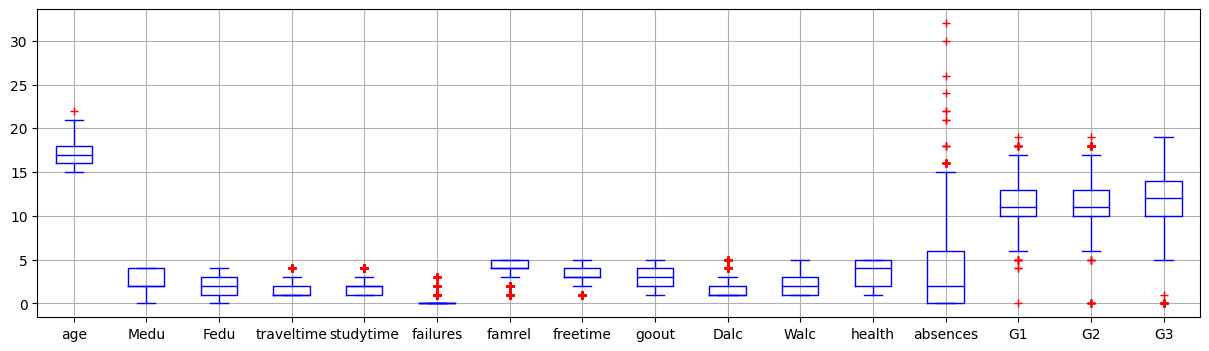

In [51]:
plt.figure(figsize=(15,4))
data.boxplot(color='b',sym='r+')

In [52]:
from pandas_profiling import ProfileReport

df_por3 = pd.read_csv('student-por.csv', sep=';')
df_por3 = df_por3[df_por3['G3'] != 0]
profile = ProfileReport(df_por3, title="Pandas Profiling Report")
profile

C:\Users\vanes\AppData\Local\Temp\ipykernel_11852\3758143861.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [53]:
# Análise de correlação
y = df['G3']

X = df.drop(['G1', 'G2'], axis=1)

X = pd.get_dummies(X)

most_correlated = X.corr().abs()['G3'].sort_values(ascending=False)

# most_correlated = most_correlated[:30]
most_correlated

G3                   1.000000
failures             0.393316
higher_no            0.332172
higher_yes           0.332172
school_GP            0.284294
school_MS            0.284294
studytime            0.249789
Medu                 0.240151
Fedu                 0.211800
Dalc                 0.204719
Walc                 0.176619
reason_reputation    0.170944
address_U            0.167637
address_R            0.167637
internet_no          0.150025
internet_yes         0.150025
Mjob_at_home         0.136778
Mjob_teacher         0.134910
reason_other         0.132577
sex_F                0.129077
sex_M                0.129077
traveltime           0.127173
Fjob_teacher         0.125916
freetime             0.122705
age                  0.106505
Mjob_health          0.101244
health               0.098851
reason_course        0.098305
absences             0.091379
romantic_no          0.090583
romantic_yes         0.090583
goout                0.087641
guardian_other       0.080729
schoolsup_

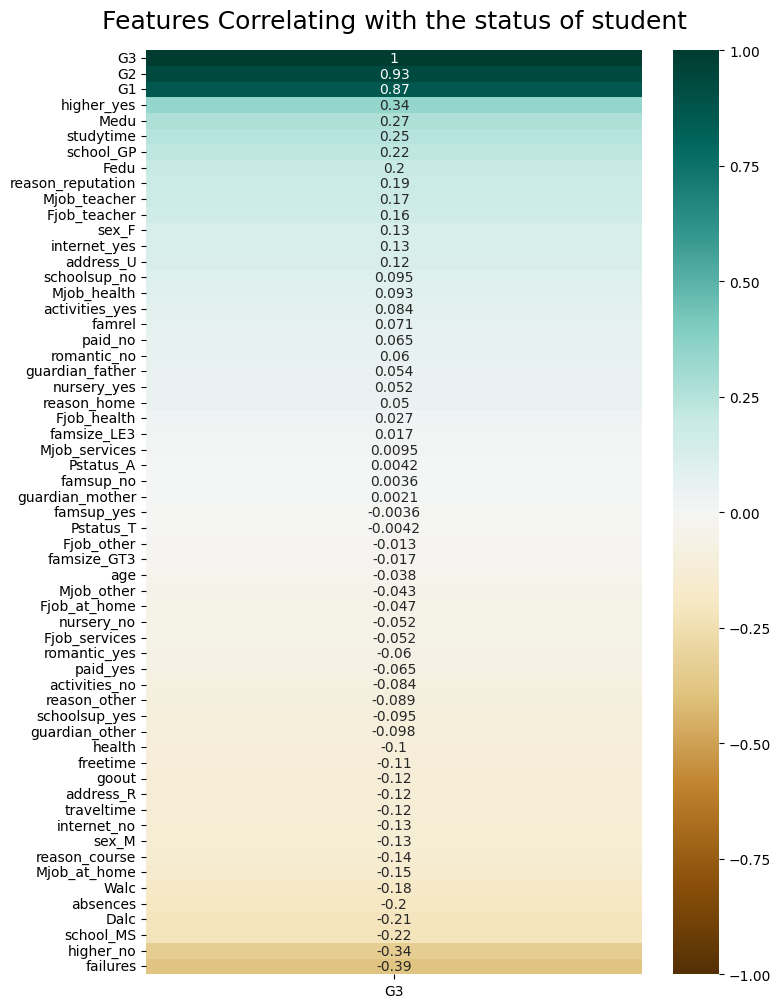

In [54]:
df_por = pd.read_csv("student-por.csv", sep=";")

df_por = pd.get_dummies(df_por)
df_por = df_por[df_por['G3'] != 0]
# Calculating the correlation matrix
correlation_matrix = df_por.corr()

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_por.corr()[['G3']].sort_values(by='G3', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16);

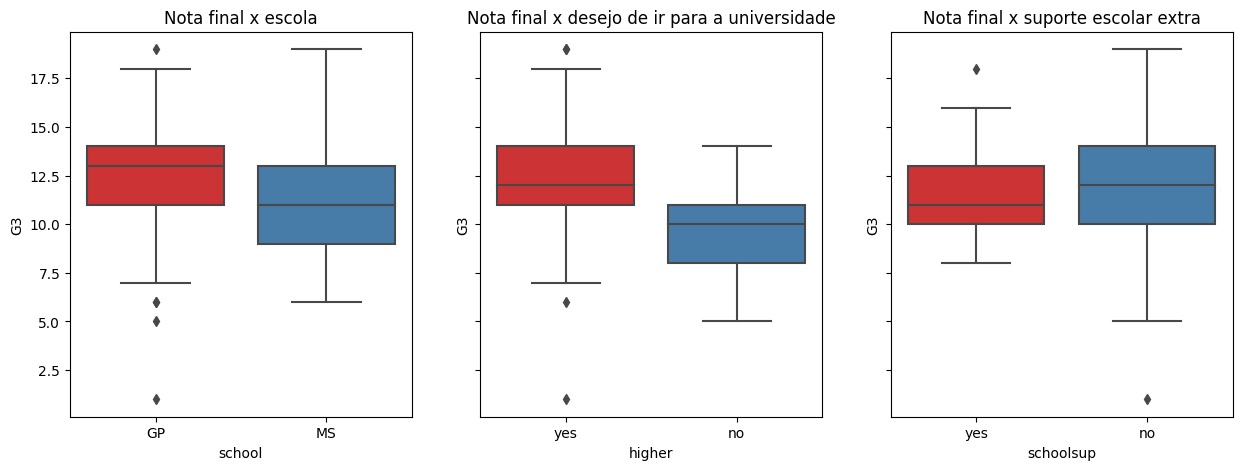

In [55]:
df_por2 = pd.read_csv('student-por.csv', sep=';')

df_por2 = df_por2[df_por2['G3'] != 0]

df_por2['alcool'] = (df_por2['Walc'] + df_por2['Dalc'])/2

#fazer um grafico com um titulo para cada boxplot e 3 boxplot um do lado do outro
# boxplot nota por escola
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axes[0].set_title("Nota final x escola")
sns.boxplot(ax=axes[0], x="school", y="G3", data=df_por2, palette="Set1")

axes[1].set_title("Nota final x desejo de ir para a universidade")
sns.boxplot(ax=axes[1], x="higher", y="G3", data=df_por2, palette="Set1")

axes[2].set_title("Nota final x suporte escolar extra")
sns.boxplot(ax=axes[2], x="schoolsup", y="G3", data=df_por2, palette="Set1")

plt.show()



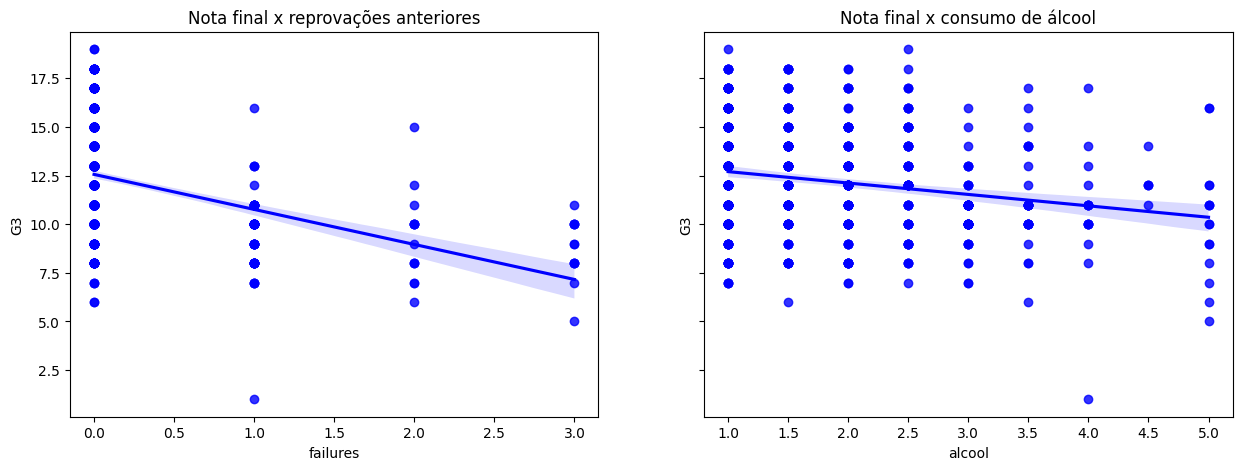

In [56]:
# gráficos de dispersão um ao lado do outro com regressão linear
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

axes[0].set_title("Nota final x reprovações anteriores")
sns.regplot(ax=axes[0], x="failures", y="G3", data=df_por2, color="blue")

axes[1].set_title("Nota final x consumo de álcool")
sns.regplot(ax=axes[1], x="alcool", y="G3", data=df_por2, color="blue")

plt.show()


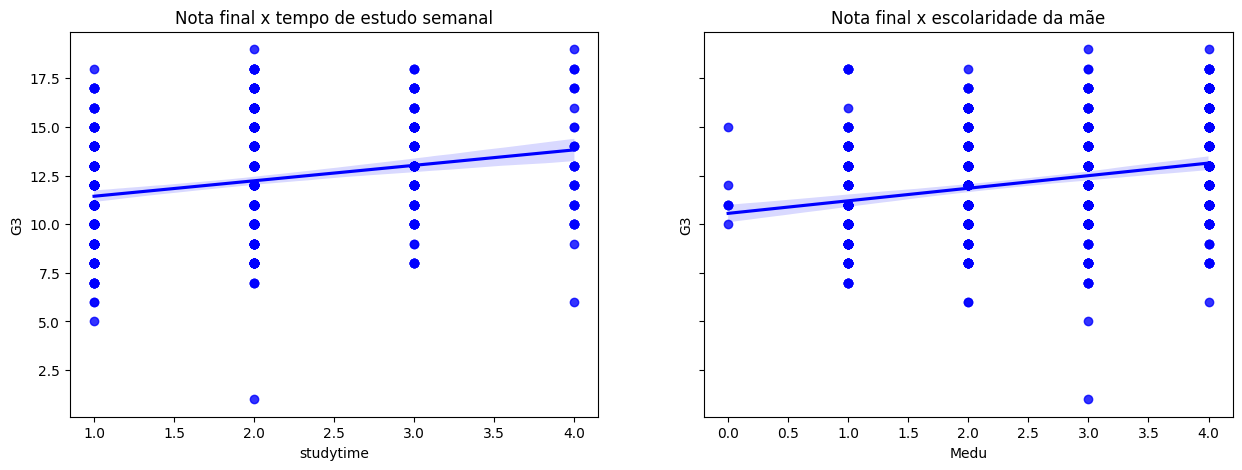

In [57]:
# gráficos de dispersão um ao lado do outro com regressão linear
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

axes[0].set_title("Nota final x tempo de estudo semanal")
sns.regplot(ax=axes[0], x="studytime", y="G3", data=df_por2, color="blue")

axes[1].set_title("Nota final x escolaridade da mãe")
sns.regplot(ax=axes[1], x="Medu", y="G3", data=df_por2, color="blue")

plt.show()

# Aplicando o modelo

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Definir as variáveis preditoras (X) e a variável de resposta (y)
# X = df_por[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']]
# X = df_por[['school', 'sex', 'age', 'address', 'Medu', 'studytime', 'failures', 'higher', 'internet', 'romantic', 'goout', 'Dalc', 'absences']]
# X = df_por[['school', 'age', 'Medu', 'studytime', 'failures', 'higher', 'Dalc', 'address']]

# adicionar coluna que é a media de Wal e Dalc
df_por['alcool'] = (df_por['Walc'] + df_por['Dalc'])/2


X = df_por[['studytime','school_GP', 'higher_yes', 'failures', 'Medu', 'alcool', 'schoolsup_yes']]
y = df_por['G3']
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Adicionar uma coluna constante aos preditores
# X_train = sm.add_constant(X_train)

# Ajustar o modelo OLS aos dados
model = sm.OLS(y_train, X_train, cov_type='HC2')
result = model.fit()

# Covariância robusta
# result = model.fit(cov_type='HC2')

# Imprimir os resultados
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     35.06
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           8.72e-40
Time:                        14:58:17   Log-Likelihood:                -1111.1
No. Observations:                 507   AIC:                             2238.
Df Residuals:                     499   BIC:                             2272.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.8377      0.496     19.822

C:\Users\vanes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)


#### RMSE

In [59]:
# calcular MSE
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

mse = mean_squared_error(y_test, result.predict(X_test))
rmse = rmse(y_test, result.predict(X_test))
print("MSE: ", mse)
print("RMSE: ", rmse)

MSE:  6.2426237649945335
RMSE:  2.4985243174711216


### Intervalos de confiança dos coeficientes

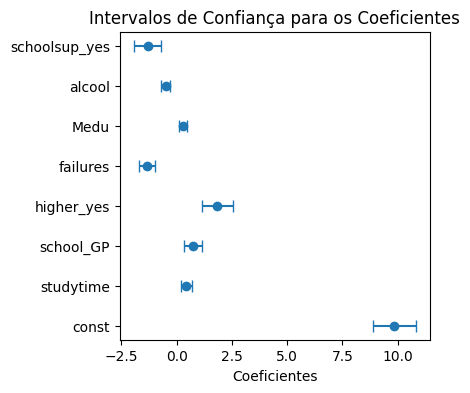

In [60]:
# Obtém as estimativas dos coeficientes
coeficientes = result.params

# Obtém os erros padrão dos coeficientes
erros_padrao = result.bse

# Define o nível de confiança desejado (por exemplo, 95%)
nivel_confianca = 0.95

# Calcula os limites dos intervalos de confiança
lower_limits = coeficientes - 1.96 * erros_padrao
upper_limits = coeficientes + 1.96 * erros_padrao

# Define os rótulos para os coeficientes
labels = coeficientes.index

# Cria um gráfico de barras com os intervalos de confiança
fig, ax = plt.subplots(figsize=(4, 4))
plt.errorbar( coeficientes, np.arange(len(coeficientes)),xerr=1.96 * erros_padrao, fmt='o', capsize=4)
plt.yticks(np.arange(len(coeficientes)), labels)
plt.xlabel('Coeficientes')
plt.title('Intervalos de Confiança para os Coeficientes')
plt.show()


### Verificando a normalidade dos resíduos

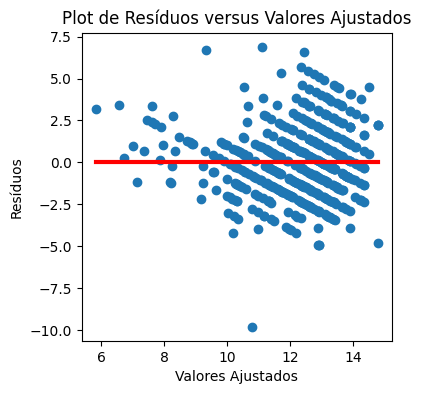

In [61]:
# Obtém os resíduos
residuals = result.resid

# Plota os resíduos versus os valores ajustados
fig, ax = plt.subplots(figsize=(4, 4))
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Plot de Resíduos versus Valores Ajustados')
# Plota a linha no zero
plt.plot([min(result.fittedvalues), max(result.fittedvalues)], [0, 0], color='red', lw=3)
plt.show()

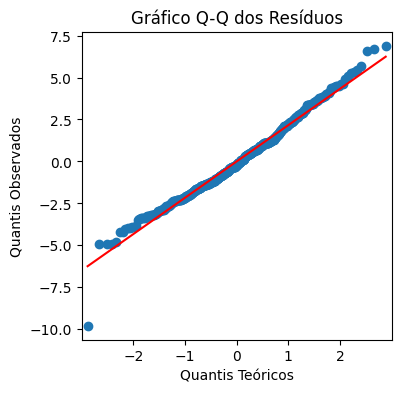

In [62]:
import statsmodels.graphics.gofplots as gofplots

# Obtém os resíduos do modelo
residuals = result.resid

# Gera o gráfico Q-Q plot dos resíduos
# alterar o tamanho da figura
plt.rc("figure", figsize=(4,4))
gofplots.qqplot(residuals, line='s')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Observados')
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()

In [63]:
import numpy as np

# Obtém os resíduos do modelo
residuals = result.resid

# Calcula a média dos resíduos
residuals_mean = np.mean(residuals)

# Imprime a média dos resíduos
print("Média dos resíduos:", residuals_mean)


Média dos resíduos: -8.016379582934464e-15


In [64]:
from scipy.stats import shapiro

# Executa o teste de Shapiro-Wilk nos resíduos
_, p_value = shapiro(residuals)
print("p-value do teste de Shapiro-Wilk:", p_value)

p-value do teste de Shapiro-Wilk: 0.0001673552906140685


#### Anova 

In [68]:
from scipy import stats

student_data = pd.read_csv('student-por.csv', sep=";")

# Perform ANOVA
result = stats.f_oneway(student_data['G3'][student_data['higher'] == 'yes'],
                        student_data['G3'][student_data['higher'] == 'no'])
# Print ANOVA results
print("ANOVA results:")
print("F-value:", result.statistic)
print("p-value:", result.pvalue)

ANOVA results:
F-value: 80.24245287906326
p-value: 3.4996595928298785e-18
